# Hopfield networks

This will be a basic overview of Hopfield networks (Hopfield, 1982). It's largely based on the first chapter of Hertz, Krogh, & Palmer (1991), in my opinion one of the best books on neural networks ever written.

For now, I'll just present the code for the full, stochastic, asynchronous Hopfield net, but I plan to build up to it from simpler models in the future.

The Hopfield network is a simple associative memory, so I'll look at how it recalls a memory when initialized from a random point and from near one of its pre-trained patterns.

In [48]:
import numpy as np

# random patterns to be learned
nunits = 100
# How long to run the network. Since its stochastic and only updates one unit at a time,
# it takes some steps to settle on a pattern
ntsteps = 500
npats = 5  # Number of patterns to store
# Matrix of random patterns, one per row
pat = 2 * np.random.binomial(1, 0.5, [npats, nunits]) - 1

# setting weights via Hebbian covariance rule
W = (pat.T @ pat) / npats # outer prod ~> weight matix
# adding some noise to minimize effect of spurious attractors (HKP)
W += np.random.normal(0, 0.1, size = W.shape)
W = W - np.diag(W.diagonal())  # zeros on the diagonal

# set random initial state
state = np.random.uniform(-0.1, 0.1, nunits)

# Dynamics
temp = 0.1
beta = 1 / temp  # Noise level
overlap = np.zeros([ntsteps, npats])  # similarity to trained pattern
H = np.zeros(ntsteps)  # energy of the state at each time step

for t in range(0, ntsteps):
    update_idx = np.random.choice(nunits, 1)  # select one unit at random to update
    #h = W[update_idx, :] @ pat[:, 0]  # using zeroth pattern
    h = W[update_idx, :] @ state  # updating from the initially random state
    p = 1. / (1. + np.exp(-2. * beta * h))
    state[update_idx] = 2 * np.random.binomial(1, p, 1) - 1
    
    for curr_pat in range(npats): # calc overlap with ea. stored pattern
        overlap[t, curr_pat] = (state.T @ pat[curr_pat, :]) / nunits
    H[t] = (-1 / nunits) * W.dot(state).dot(state)



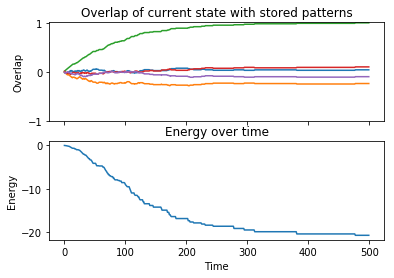

In [49]:
# Plotting
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(overlap)
axarr[0].set_ylim([-1.01, 1.01])
axarr[0].set_title('Overlap of current state with stored patterns')
axarr[0].set_ylabel('Overlap')
axarr[1].plot(H)
axarr[1].set_title('Energy over time')
axarr[1].set_ylabel('Energy')
axarr[1].set_xlabel('Time')
plt.show()

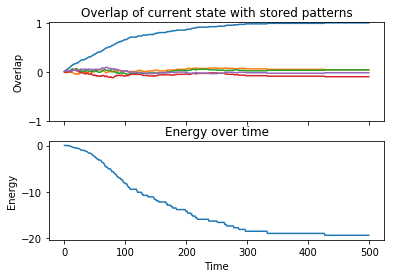

In [53]:
# Now trying from the zeroth pattern
overlap = np.zeros([ntsteps, npats])  # similarity to trained pattern
H = np.zeros(ntsteps)  # energy of the state at each time step
state = np.random.uniform(-0.1, 0.1, nunits)

for t in range(0, ntsteps):
    update_idx = np.random.choice(nunits, 1)  # select one unit at random to update
    h = W[update_idx, :] @ pat[0, :]  # using zeroth pattern as input
    p = 1. / (1. + np.exp(-2. * beta * h))
    state[update_idx] = 2 * np.random.binomial(1, p, 1) - 1
    
    for curr_pat in range(npats): # calc overlap with ea. stored pattern
        overlap[t, curr_pat] = (state.T @ pat[curr_pat, :]) / nunits
    H[t] = (-1 / nunits) * W.dot(state).dot(state)


f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(overlap)
axarr[0].set_ylim([-1.01, 1.01])
axarr[0].set_title('Overlap of current state with stored patterns')
axarr[0].set_ylabel('Overlap')
axarr[1].plot(H)
axarr[1].set_title('Energy over time')
axarr[1].set_ylabel('Energy')
axarr[1].set_xlabel('Time')
plt.show()